In [1]:
# import libraries
import torch
import torch.nn as nn

import numpy as np
import matplotlib.pyplot as plt

## 1. Mean-squared error Loss

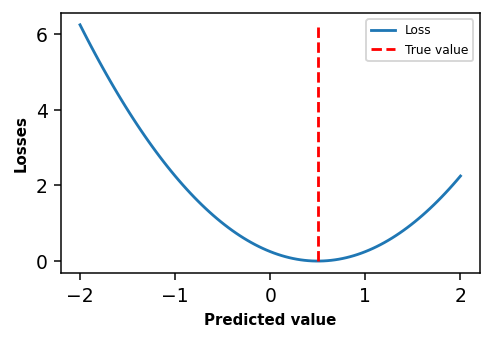

In [14]:
# Loss function
lossfunMSE = nn.MSELoss()

# create predictions and Actual Value
y_Predict = torch.linspace(-2,2,101)
y = torch.tensor(.5)

# compute MSE loss function
Losses = np.zeros(101)

for i,y_hat in enumerate(y_Predict):
    
    Losses[i] = lossfunMSE(y_hat,y)

plt.figure(figsize = (4,2.5) ,dpi = 135)

plt.plot(y_Predict,Losses,label='Loss')
plt.plot([y,y],[0,np.max(Losses)],'r--',label='True value')

plt.xlabel('Predicted value' , fontweight = "bold" , fontsize = 8)
plt.ylabel("Losses" ,fontweight = "bold" , fontsize = 8)
plt.legend(fontsize = 6.5)
plt.show()

## 2.  Binary cross-entropy

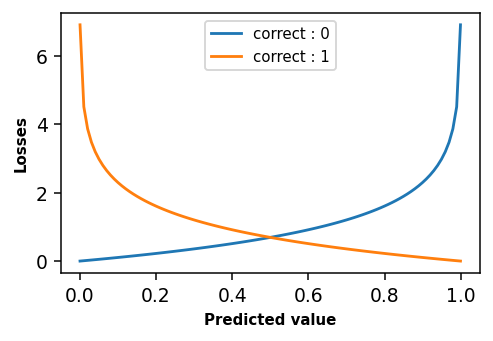

In [16]:
# Loss function : Two class or Binary classification

# The Inputs both Predicted and Actual must be between 0 and 1.
# Therefore, need to use sigmoid in the output layer.
lossfunBCE = nn.BCELoss()

# create predictions and Actual Value
y_predict = torch.linspace(.001,.999,101)
y1 = torch.tensor(0.)
y2 = torch.tensor(1.)

# compute MSE loss function
Losses = np.zeros((101,2))

for i,yhat in enumerate(y_predict):
    
    Losses[i,0] = lossfunBCE(yhat,y1) # When 0 is the correct answer
    Losses[i,1] = lossfunBCE(yhat,y2) # When 1 is the correct answer

plt.figure(figsize = (4,2.5) ,dpi = 135)
plt.plot(y_predict,Losses)
plt.xlabel('Predicted value' ,fontweight = "bold" , fontsize = 8)
plt.ylabel('Losses' ,fontweight = "bold" , fontsize = 8)
plt.legend(['correct : 0','correct : 1'] ,  fontsize = 8)

plt.show()

In [17]:
# The example above shows data already in probabilities. 
# Raw outputs will need to be converted to probabilities:

# "raw" output of a model
yHat = torch.tensor(2.)
print(lossfunBCE(yHat,y2))

# RuntimeError : All elements of input should be between 0 and 1.

RuntimeError: all elements of input should be between 0 and 1

In [18]:
# convert to probability (0,1) via sigmoid function

sig = nn.Sigmoid()
print(lossfunBCE( sig(yHat) ,y2))

tensor(0.1269)


In [19]:
# However, PyTorch recommends using a single function that incorporates sigmoid+BCE due to 
# increased numerical stability.
# https://pytorch.org/docs/stable/generated/torch.nn.BCEWithLogitsLoss.html?highlight=nn%20bcewithlogitsloss#torch.nn.BCEWithLogitsLoss


# Thus, the recommended way to do it is to use BCEWithLogitsLoss() that 
# incorporates sigmoid+BCE internally.

lossfunBCE = nn.BCEWithLogitsLoss()

yHat = torch.tensor(2.)
print(lossfunBCE(yHat,y2))


tensor(0.1269)


## 3. Multiclass Classification :  Categorical cross-entropy

In [30]:
# loss function
# Bydefualt it internally implies nn.LogSoftmax and nn.NLLLoss (Negative Log Likelihood loss)
lossfunCCE = nn.CrossEntropyLoss()

# vector of output layer (3-Neurons) (pre-softmax)
# 3-Neurons in the output layer --> 3-categories
yHat = torch.tensor([[1.,4,3]])

for i in range(3):
    
    correctAnswer = torch.tensor([i])
    
    thisloss = lossfunCCE(yHat,correctAnswer).item()
    print( f'Loss when correct answer is {i}: {np.round(thisloss,3)}' )

Loss when correct answer is 0: 3.349
Loss when correct answer is 1: 0.349
Loss when correct answer is 2: 1.349


In [33]:
# compare raw, softmax, and log-softmax outputs

yHat = torch.tensor([[1.,4,3]])

sm = nn.Softmax(dim = 1)
yhat_sm = sm(yHat)   # it's sum equates to 1

log_sm = nn.LogSoftmax(dim=1)
yhat_logsm = sm(yHat)  # it's sum need not to equate to 1

# print them
print(yHat)
print(yhat_sm)
print(yhat_logsm)

tensor([[1., 4., 3.]])
tensor([[0.0351, 0.7054, 0.2595]])
tensor([[0.0351, 0.7054, 0.2595]])


## 4. Creating custom loss function

In [34]:
class myLoss(nn.Module): # inherent info from nn.Module
    
    def __init__(self):
        super().__init__()

    def forward(self,x,y):
        
        # loss : MAE
        loss = torch.abs(x-y)
        return loss

# test it out!
lfun = myLoss()
lfun(torch.tensor(4),torch.tensor(5.2))

tensor(1.2000)